### 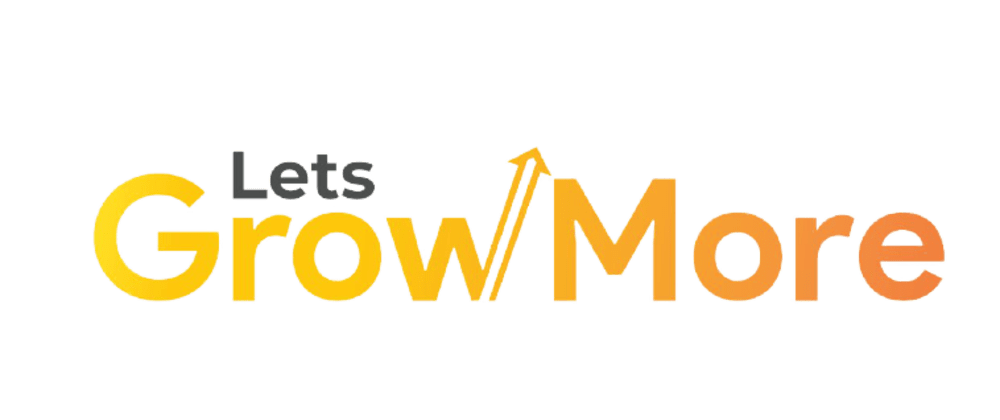
#Project 4: Music Recommendation:
Music recommender systems can suggest songs to users based on their listening patterns.

by: Shaziya Shaikh 

In [ ]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading data sets
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
mem=pd.read_csv("members.csv")
info=pd.read_csv("song_extra_info.csv")

In [ ]:
# Find Shape of data set
print("Shape of Train data",train.shape)
print("Shape of Test data",test.shape)
print("Shape of members data",mem.shape)
print("Shape of extra info data",info.shape)

Shape of Train data (15564, 6)
Shape of Test data (23384, 6)
Shape of members data (34403, 7)
Shape of extra info data (40926, 3)


In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


In [ ]:
mem.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [ ]:
info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [ ]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [ ]:
# murge train and members data set
train=pd.merge(train,mem, how='inner', on='msno', left_on=None, right_on=None,
left_index=False, right_index=False, sort=True)

In [ ]:
train.shape

(15563, 12)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15563 entries, 0 to 15562
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    15563 non-null  object 
 1   song_id                 15563 non-null  object 
 2   source_system_tab       15514 non-null  object 
 3   source_screen_name      15112 non-null  object 
 4   source_type             15521 non-null  object 
 5   target                  15563 non-null  float64
 6   city                    15563 non-null  int64  
 7   bd                      15563 non-null  int64  
 8   gender                  9353 non-null   object 
 9   registered_via          15563 non-null  int64  
 10  registration_init_time  15563 non-null  int64  
 11  expiration_date         15563 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 1.5+ MB


In [ ]:
# find % of null value in each column
def no_perc_null(df):
    no_of_null=df.isnull().sum()
    percentage_of_null=df.isnull().sum()/len(df)*100
    dtypecol=df.dtypes
    null_val=pd.concat([no_of_null,percentage_of_null,dtypecol],axis=1)
    null_val_new=null_val.rename(columns={0:"Null values",1:"Percentage",2:"Dataype"})
    return null_val_new
no_perc_null(train)

,Null values,Percentage,Dataype
msno,0,0.000000,object
song_id,0,0.000000,object
source_system_tab,49,0.314849,object
source_screen_name,451,2.897899,object
source_type,42,0.269871,object
target,0,0.000000,float64
city,0,0.000000,int64
bd,0,0.000000,int64
gender,6210,39.902332,object
registered_via,0,0.000000,int64


In [ ]:
# print unique values in each column
print("Pring unique values of each column")
for i in train.columns[2:]:
    if train[i].dtype == 'O':
        print("*"*70)
        print("number of unique values of ",i," column :",train[i].nunique())
        print("unique values:")
        print(train[i].unique())


Pring unique values of each column
**********************************************************************
number of unique values of  source_system_tab  column : 7
unique values:
['my library' 'discover' 'listen with' 'search' 'radio' 'explore'
 'notification' nan]
**********************************************************************
number of unique values of  source_screen_name  column : 17
unique values:
['Local playlist more' nan 'Unknown' 'Discover Feature' 'Discover Chart'
 'My library_Search' 'Online playlist more' 'Others profile more'
 'Artist more' 'Radio' 'Album more' 'Explore' 'Search' 'My library'
 'Discover Genre' 'Search Trends' 'Discover New' 'Search Home']
**********************************************************************
number of unique values of  source_type  column : 10
unique values:
['local-library' 'local-playlist' 'online-playlist' 'listen-with'
 'song-based-playlist' 'top-hits-for-artist' 'radio' 'album' 'song' nan
 'artist']
*****************************

In [ ]:
# replace null value with unknown in object datatype and 0 in integer
for i in train.select_dtypes(include=['object']).columns:
    train[i][train[i].isnull()]='unknown'

train=train.fillna(value=0)

<ipython-input-13-4b93b1c60f28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i][train[i].isnull()]='unknown'


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15563 entries, 0 to 15562
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    15563 non-null  object 
 1   song_id                 15563 non-null  object 
 2   source_system_tab       15563 non-null  object 
 3   source_screen_name      15563 non-null  object 
 4   source_type             15563 non-null  object 
 5   target                  15563 non-null  float64
 6   city                    15563 non-null  int64  
 7   bd                      15563 non-null  int64  
 8   gender                  15563 non-null  object 
 9   registered_via          15563 non-null  int64  
 10  registration_init_time  15563 non-null  int64  
 11  expiration_date         15563 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 1.5+ MB


In [ ]:
# drop msno and songs id 
train=train[['source_system_tab', 'source_screen_name',
       'source_type', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date', 'target']]

In [ ]:
train.head(10)

,source_system_tab,source_screen_name,source_type,city,bd,gender,registered_via,registration_init_time,expiration_date,target
0,my library,Local playlist more,local-library,1,0,unknown,7,20151212,20170911,0.0
1,my library,Local playlist more,local-library,1,0,unknown,7,20151212,20170911,1.0
2,my library,Local playlist more,local-library,1,0,unknown,7,20151212,20170911,1.0
3,my library,Local playlist more,local-library,1,0,unknown,7,20151212,20170911,0.0
4,my library,Local playlist more,local-library,1,0,unknown,7,20151212,20170911,1.0
5,my library,Local playlist more,local-library,13,25,female,9,20060623,20171025,1.0
6,my library,unknown,local-library,13,25,female,9,20060623,20171025,1.0
7,my library,unknown,local-library,13,25,female,9,20060623,20171025,1.0
8,my library,Local playlist more,local-library,13,25,female,9,20060623,20171025,1.0
9,my library,Local playlist more,local-library,13,25,female,9,20060623,20171025,1.0


In [ ]:
# convert registration_init_time to date time format and separe in columns
train['registration_init_time'] = pd.to_datetime(train['registration_init_time'], format='%Y%m%d',errors='ignore')
train['registration_init_year']=train['registration_init_time'].dt.year
train['registration_init_month']=train['registration_init_time'].dt.month
train['registration_init_day']=train['registration_init_time'].dt.day

In [ ]:
# convert expiration_date to date time format and separe in columns
train['expiration_date'] = pd.to_datetime(train['expiration_date'], format='%Y%m%d',errors='ignore')
train['expiration_year']=train['expiration_date'].dt.year
train['expiration_month']=train['expiration_date'].dt.month
train['expiration_day']=train['expiration_date'].dt.day

In [ ]:
# convert objects into binary format
train=pd.get_dummies(train,columns=['source_system_tab','source_screen_name','source_type','gender'],drop_first=True)

In [ ]:
train.head()

,city,bd,registered_via,registration_init_time,expiration_date,target,registration_init_year,registration_init_month,registration_init_day,expiration_year,...,source_type_local-library,source_type_local-playlist,source_type_online-playlist,source_type_radio,source_type_song,source_type_song-based-playlist,source_type_top-hits-for-artist,source_type_unknown,gender_male,gender_unknown
0,1,0,7,2015-12-12,2017-09-11,0.0,2015,12,12,2017,...,1,0,0,0,0,0,0,0,0,1
1,1,0,7,2015-12-12,2017-09-11,1.0,2015,12,12,2017,...,1,0,0,0,0,0,0,0,0,1
2,1,0,7,2015-12-12,2017-09-11,1.0,2015,12,12,2017,...,1,0,0,0,0,0,0,0,0,1
3,1,0,7,2015-12-12,2017-09-11,0.0,2015,12,12,2017,...,1,0,0,0,0,0,0,0,0,1
4,1,0,7,2015-12-12,2017-09-11,1.0,2015,12,12,2017,...,1,0,0,0,0,0,0,0,0,1


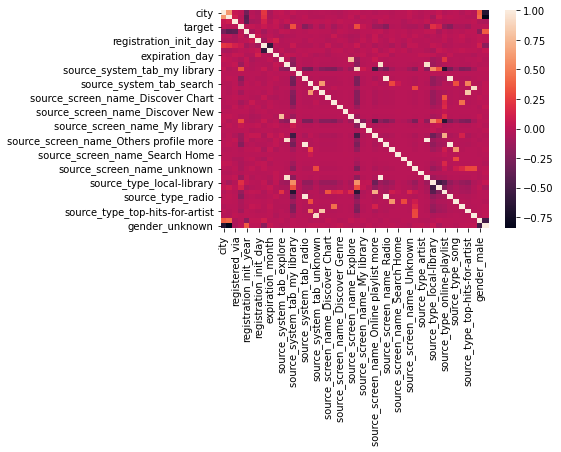

In [ ]:
# neatmap of correlation
sns.heatmap(train.corr())

In [ ]:
#correlation of features with target
train.corr()['target'].sort_values(axis=0, ascending=False)

target                                     1.000000
source_system_tab_my library               0.324268
source_screen_name_Local playlist more     0.310266
source_type_local-library                  0.196779
source_type_local-playlist                 0.128948
expiration_year                            0.064458
source_screen_name_My library              0.055445
registration_init_month                    0.039874
expiration_day                             0.035615
city                                       0.021926
source_screen_name_Discover New            0.009879
gender_unknown                             0.008524
expiration_month                           0.008313
source_system_tab_notification             0.006247
registration_init_day                      0.005158
registered_via                             0.002977
source_type_unknown                        0.002294
source_screen_name_My library_Search       0.001323
source_screen_name_Discover Chart          0.000176
gender_male 

In [ ]:
# drop date format columns
train=train.drop(columns=['registration_init_time','expiration_date'])

In [ ]:
# seperate target and features 
y=train['target'].astype(int)

In [ ]:
x=train.drop(columns=['target'])

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15563 entries, 0 to 15562
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   city                                     15563 non-null  int64
 1   bd                                       15563 non-null  int64
 2   registered_via                           15563 non-null  int64
 3   registration_init_year                   15563 non-null  int64
 4   registration_init_month                  15563 non-null  int64
 5   registration_init_day                    15563 non-null  int64
 6   expiration_year                          15563 non-null  int64
 7   expiration_month                         15563 non-null  int64
 8   expiration_day                           15563 non-null  int64
 9   source_system_tab_explore                15563 non-null  uint8
 10  source_system_tab_listen with            15563 non-null  uint8
 11  so

In [ ]:
# Train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape

(12450, 45)

In [ ]:
x_test.shape

(3113, 45)

In [ ]:
y_train.shape

(12450,)

In [ ]:
y_test.shape

(3113,)

In [ ]:
# Train Random forest model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)  
clf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
# find accuracy of model
from sklearn import metrics 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.8560873755220045


In [ ]:
# using the feature importance variable
feature_imp = pd.Series(clf.feature_importances_, index = x_train.columns).sort_values(ascending = False)
feature_imp

registration_init_day                      0.122788
expiration_day                             0.114570
registration_init_month                    0.091868
registration_init_year                     0.086982
source_system_tab_my library               0.075341
bd                                         0.075087
expiration_month                           0.066363
city                                       0.062847
registered_via                             0.035988
source_screen_name_Local playlist more     0.030601
expiration_year                            0.021269
source_type_local-library                  0.019291
gender_male                                0.018447
source_system_tab_radio                    0.016449
source_type_radio                          0.015154
source_type_online-playlist                0.014144
source_screen_name_Radio                   0.013654
source_type_local-playlist                 0.013363
gender_unknown                             0.011885
source_scree

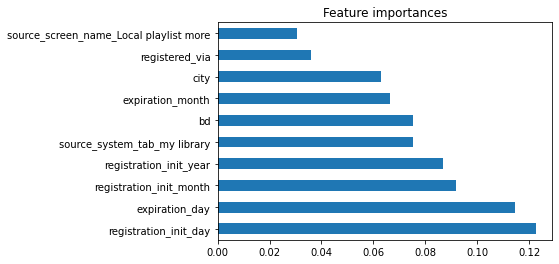

In [ ]:

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
pd.Series(clf.feature_importances_, index=x_train.columns).nlargest(10).plot(kind='barh')

plt.show()